# UniAD数据分析

使用`pickle`分析UniAD的测试数据

result.pkl是一个pickle文件, 包含了一个字典, 其中包含了UniAD的评估数据

- 'bbox_results': 感知bbox的评估数据
- 'occ_results_computed': 预测Occ的评估数据
- 'planning_results_computed': 规划结果相关

In [1]:
import pickle

# 文件路径
file_path = "/home2/lixiang/UniAD_demo/experiments/origin/stage2/origin/output/11041145.pkl"

# 加载数据 时间较长
with open(file_path, "rb") as file:
    data = pickle.load(file)

In [2]:
# 查看数据类型和结构
print(type(data))
print(data.keys() if isinstance(data, dict) else data)

<class 'dict'>
dict_keys(['bbox_results', 'occ_results_computed', 'planning_results_computed'])


## bbox结果分析 感知预测结果和规划的实际结果都在里面

bbox是一个list,包含每一帧的感知结果，用`token`来标识每一帧, 每个元素是一个dict, 包含以下字段: 
- token
- 'track_bbox_results', 'boxes_3d', 'scores_3d', 'labels_3d', 'track_scores', 'track_ids': 每一帧感知到的agent的box和得分和分类，太多，不详细描述
- 'sdc_boxes_3d', 'sdc_scores_3d', 'sdc_track_scores', 'sdc_track_bbox_results': 每一帧感知到的自车的box和得分和分类画图解析
- traj, traj_score: 预测轨迹traj形如`[agent_num, traj_num, 12, 5]` 记录agent_num个agent的traj_num个预测的未来12步(6s)的轨迹, traj_score是对应的得分
- planning_traj, planning_traj_score: 规划的轨迹，形如`[1, 6, 2]` 记录规划的未来6步(3s)的轨迹，planning_traj_score是对应的得分

In [60]:
bbox = data["bbox_results"]
print("bbox len:", len(bbox))
bbox_key_dict = bbox[0].keys()
print("bbox_key_dict:", bbox_key_dict)

print(bbox[200]['sdc_scores_3d'])

bbox len: 6019
bbox_key_dict: dict_keys(['token', 'track_bbox_results', 'boxes_3d', 'scores_3d', 'labels_3d', 'track_scores', 'track_ids', 'sdc_boxes_3d', 'sdc_scores_3d', 'sdc_track_scores', 'sdc_track_bbox_results', 'boxes_3d_det', 'scores_3d_det', 'labels_3d_det', 'traj_0', 'traj_scores_0', 'traj_1', 'traj_scores_1', 'traj', 'traj_scores', 'ret_iou', 'planning_traj', 'planning_traj_gt', 'command'])
tensor([0.4024])


bbox len: 6019
bbox_key_dict: dict_keys(['token', 'track_bbox_results', 'boxes_3d', 'scores_3d', 'labels_3d', 'track_scores', 'track_ids', 'sdc_boxes_3d', 'sdc_scores_3d', 'sdc_track_scores', 'sdc_track_bbox_results', 'boxes_3d_det', 'scores_3d_det', 'labels_3d_det', 'traj_0', 'traj_scores_0', 'traj_1', 'traj_scores_1', 'traj', 'traj_scores', 'ret_iou', 'planning_traj', 'planning_traj_gt', 'command'])
torch.Size([12, 5])
tensor([[ 1.2645e-01,  3.2096e+00,  6.9112e+00,  4.3628e+00, -4.8728e-02],
        [ 2.0644e-01,  6.5315e+00,  2.3679e+00,  2.3324e+00, -6.2235e-03],
        [ 2.7292e-01,  9.9232e+00,  2.1849e+00,  1.5527e+00,  2.9582e-02],
        [ 3.2778e-01,  1.3392e+01,  1.6553e+00,  1.1397e+00, -9.0119e-03],
        [ 3.0217e-01,  1.6963e+01,  1.3311e+00,  1.0450e+00,  9.3976e-03],
        [ 2.6316e-01,  2.0523e+01,  1.1846e+00,  9.2379e-01, -4.0205e-03],
        [ 1.4864e-01,  2.4158e+01,  1.0099e+00,  9.2023e-01, -9.3260e-02],
        [ 3.1285e-02,  2.7794e+01,  9.2436e-01,  9

/home2/lixiang/miniconda3/envs/uniad/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:140: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/home2/lixiang/miniconda3/envs/uniad/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, z

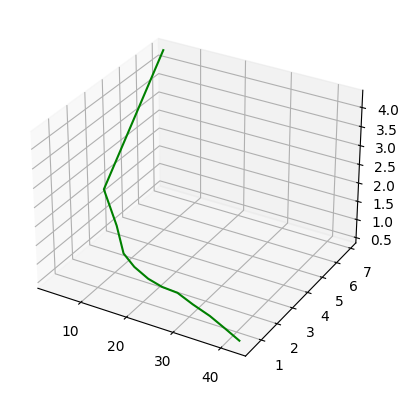

In [3]:
bbox = data["bbox_results"]
print("bbox len:", len(bbox))
bbox_key_dict = bbox[0].keys()
print("bbox_key_dict:", bbox_key_dict)

# for key in bbox_key_dict:
#     print(key, len(bbox[0][key]))
# for bbox_single in bbox:
#     print("command:", bbox_single["command"])
# 绘制前5个轨迹
import matplotlib.pyplot as plt
import numpy as np

for i in range(1):
    traj = bbox[i]["traj"]
    traj_scores = bbox[i]["traj_scores"]

    # 绿色为预测轨迹，红色为真实轨迹
    print(traj[0][0].shape)
    print(traj[0][0])
    # 绘制3D轨迹第二列到第四列
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(traj[0][0][:, 1], traj[0][0][:, 2], traj[0][0][:, 3], color='g', label='pred')
plt.show()

## Occ

总体Occ的评估结果, 包含以下字段:

每项一般有2个值，第一项`-n`表示近距离(30m x 30m)的评估结果，第二项`-f`表示远距离(50m x 50m)的评估结果

- pq (Panoptic Quality): 表示全景质量，结合了分割质量（精确度）和识别能力（召回率）**越大越好** (**论文中用这个指标对比**)
- sq (Segmentation Quality): 表示分割质量，通常衡量模型在分割过程中对边界细节的把握情况。**越大越好**
- rq (Recognition Quality): 表示识别质量，通常衡量模型在识别过程中对类别的识别准确率。**越大越好**
- denominator: 标准化的分母，用于计算pq, sq, rq
- iou (Intersection over Union): 是一种衡量预测分割和真实分割区域之间重叠程度的指标,越高的值表示预测和真实区域的重叠程度越高，即分割结果越准确. **越大越好**。(**论文中用这个指标对比**)
- num_occ: 预测的occ数量，统计值
- ratio_occ: 表示区域的占据比率，即预测的occ数量占总区域的比率。**评估场景密集程度**



In [4]:
occ = data['occ_results_computed']
occ_key_dict = occ.keys()
print("occ_keys: ", occ_key_dict)
for key in occ_key_dict:
    print(key, ": ", occ[key])

occ_keys:  dict_keys(['pq', 'sq', 'rq', 'denominator', 'iou', 'num_occ', 'ratio_occ'])
pq :  [55.17648458480835, 34.161365032196045]
sq :  [75.82287788391113, 70.89483737945557]
rq :  [72.77023196220398, 48.18597435951233]
denominator :  [9501550.0, 33389800.0]
iou :  [63.80811929702759, 40.53342342376709]
num_occ :  1705
ratio_occ :  0.28326964612061806


## Planning

均为规划**未来6步，每步0.5s，共3s**的规划结果

- obj_col: 和障碍物实体的碰撞率
- obj_box: 和障碍物bbox的碰撞率：一般取这个
- L2: 和真实轨迹的L2距离

In [5]:
planning = data['planning_results_computed']
planning_key_dict = planning.keys()
print("planning_keys: ", planning_key_dict)
for key in planning_key_dict:
    print(key, ": ", planning[key])

planning_keys:  dict_keys(['obj_col', 'obj_box_col', 'L2'])
obj_col :  tensor([0.0000, 0.0000, 0.0003, 0.0003, 0.0007, 0.0010], device='cuda:0')
obj_box_col :  tensor([0.0003, 0.0010, 0.0013, 0.0015, 0.0030, 0.0061], device='cuda:0')
L2 :  tensor([0.3355, 0.5072, 0.7193, 0.9824, 1.2903, 1.6498], device='cuda:0')
